
<div class="alert alert-block alert-success">

# **1.** **Import Libraries**

<div>


In [3]:
# Add the parent directory to the path
import sys
import os
import ast
import pickle
sys.path.append(os.path.abspath('..'))

from utils import *

In [4]:
sns.set_theme(style="whitegrid", font_scale=1.2)


<div class="alert alert-block alert-success">

# **2.** **Configurations Comparison: analyzing combinations of selection methods and crossover and mutation operators**

<div>


## **2.1** Create Dictionary with Fitnesses Obtained for Each Combination

We have to combine all the results obtained in reach run of the configurations for each selection method.

In [11]:
df_ga = pd.read_csv('results/ga/results_all_selections.csv')

In [12]:
df_ga['Config'] = df_ga['Selection'] + '_' + df_ga['Crossover'] + '_' + df_ga['Mutation']

fitness_dfs = {}
for config_name, group in df_ga.groupby('Config'):
    all_runs = []
    
    for fitness_json in group['Gens_Best_Fitness']:
        # Parse fitness list (handle both stringified JSON and actual lists)
        if isinstance(fitness_json, str):
            fitness_list = json.loads(fitness_json)
        else:
            fitness_list = fitness_json  # already a list
        all_runs.append(fitness_list)

    fitness_results = pd.DataFrame(all_runs)
    fitness_dfs[config_name] = fitness_results

In [13]:
for key in fitness_dfs.keys():
    print(key)

fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation
fitness_proportionate_selection_pmx_crossover_n_swap_mutation
fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation
fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation
fitness_proportionate_selection_pmx_crossover_scramble_mutation
ranking_selection_fitness_based_slot_crossover_n_swap_mutation
ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation
ranking_selection_fitness_based_slot_crossover_prime_slot_swap_mutation
ranking_selection_fitness_based_slot_crossover_scramble_mutation
ranking_selection_pmx_crossover_n_swap_mutation
ranking_selection_pmx_crossover_preserve_best_slots_mutation
ranking_sel

Checking if the format is correct:

In [14]:
fitness_dfs["fitness_proportionate_selection_pmx_crossover_n_swap_mutation"]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.303008,1.465833,1.465833,1.465833,1.465833,1.486547,1.486547,1.486547,1.486547,1.486547,...,1.581744,1.602944,1.602944,1.602944,1.602944,1.602944,1.602944,1.602944,1.602944,1.602944
1,1.288324,1.288324,1.289780,1.300293,1.300293,1.300293,1.311698,1.311698,1.311698,1.314258,...,1.541145,1.541145,1.541145,1.541145,1.541145,1.541145,1.541145,1.541145,1.541145,1.541145
2,1.252436,1.252436,1.252436,1.275009,1.293347,1.302275,1.302275,1.328177,1.328177,1.335865,...,1.511488,1.511488,1.511488,1.511488,1.511488,1.511488,1.511488,1.511488,1.511488,1.511488
3,1.262664,1.262664,1.265522,1.289125,1.348379,1.348379,1.348379,1.348379,1.348379,1.363489,...,1.553631,1.553631,1.553631,1.553631,1.553631,1.553631,1.553631,1.553631,1.553631,1.567917
4,1.322325,1.322325,1.327294,1.327294,1.327294,1.360604,1.368805,1.368805,1.368805,1.368805,...,1.507573,1.507573,1.507573,1.507573,1.507573,1.507573,1.507573,1.507573,1.507573,1.507573
5,1.285348,1.338205,1.338205,1.338205,1.338205,1.338205,1.338205,1.368205,1.368205,1.368205,...,1.468631,1.468631,1.468631,1.468631,1.468631,1.468631,1.468631,1.468631,1.468631,1.468631
6,1.328008,1.356291,1.356291,1.356291,1.374148,1.374148,1.374148,1.380604,1.380604,1.380604,...,1.486918,1.486918,1.486918,1.486918,1.486918,1.486918,1.486918,1.486918,1.486918,1.486918
7,1.258383,1.286442,1.286442,1.286442,1.286442,1.286442,1.286442,1.286442,1.289299,1.326726,...,1.507349,1.507349,1.507349,1.507349,1.507349,1.535119,1.535119,1.535119,1.535119,1.535119
8,1.243663,1.286749,1.286749,1.303782,1.303782,1.303782,1.303782,1.303782,1.303782,1.303782,...,1.453887,1.453887,1.453887,1.453887,1.453887,1.453887,1.453887,1.453887,1.453887,1.453887
9,1.245320,1.245320,1.277953,1.277953,1.277953,1.277953,1.277953,1.277953,1.277953,1.307349,...,1.461630,1.461630,1.461630,1.461630,1.461630,1.461630,1.461630,1.461630,1.461630,1.461630


## **2.2** Configurations' Comparison by Selection Method

### **2.2.1** Collecting the data

In [15]:
fitprop_fitness_dfs = {
    k: v for k, v in fitness_dfs.items()
    if k.startswith('fitness_proportionate_selection')
}

ranking_fitness_dfs = {
    k: v for k, v in fitness_dfs.items()
    if k.startswith('ranking_selection')
}

tournament_fitness_dfs = {
    k: v for k, v in fitness_dfs.items()
    if k.startswith('tournament_selection')
}

### **2.2.2** Mean/Median Fitness over Generation Line Charts

In [16]:
plot_fitness(fitness_dfs, title_suffix='All Selection Methods')
plot_fitness(fitprop_fitness_dfs, title_suffix='Fitness-Proportionate Selection')
plot_fitness(ranking_fitness_dfs, title_suffix='Ranking Selection')
plot_fitness(tournament_fitness_dfs, title_suffix='Tournament Selection')

### **2.2.3** Standard Deviation (Box Plot)

/Users/brunasimoes/Desktop/nova_ims/2_semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:174: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




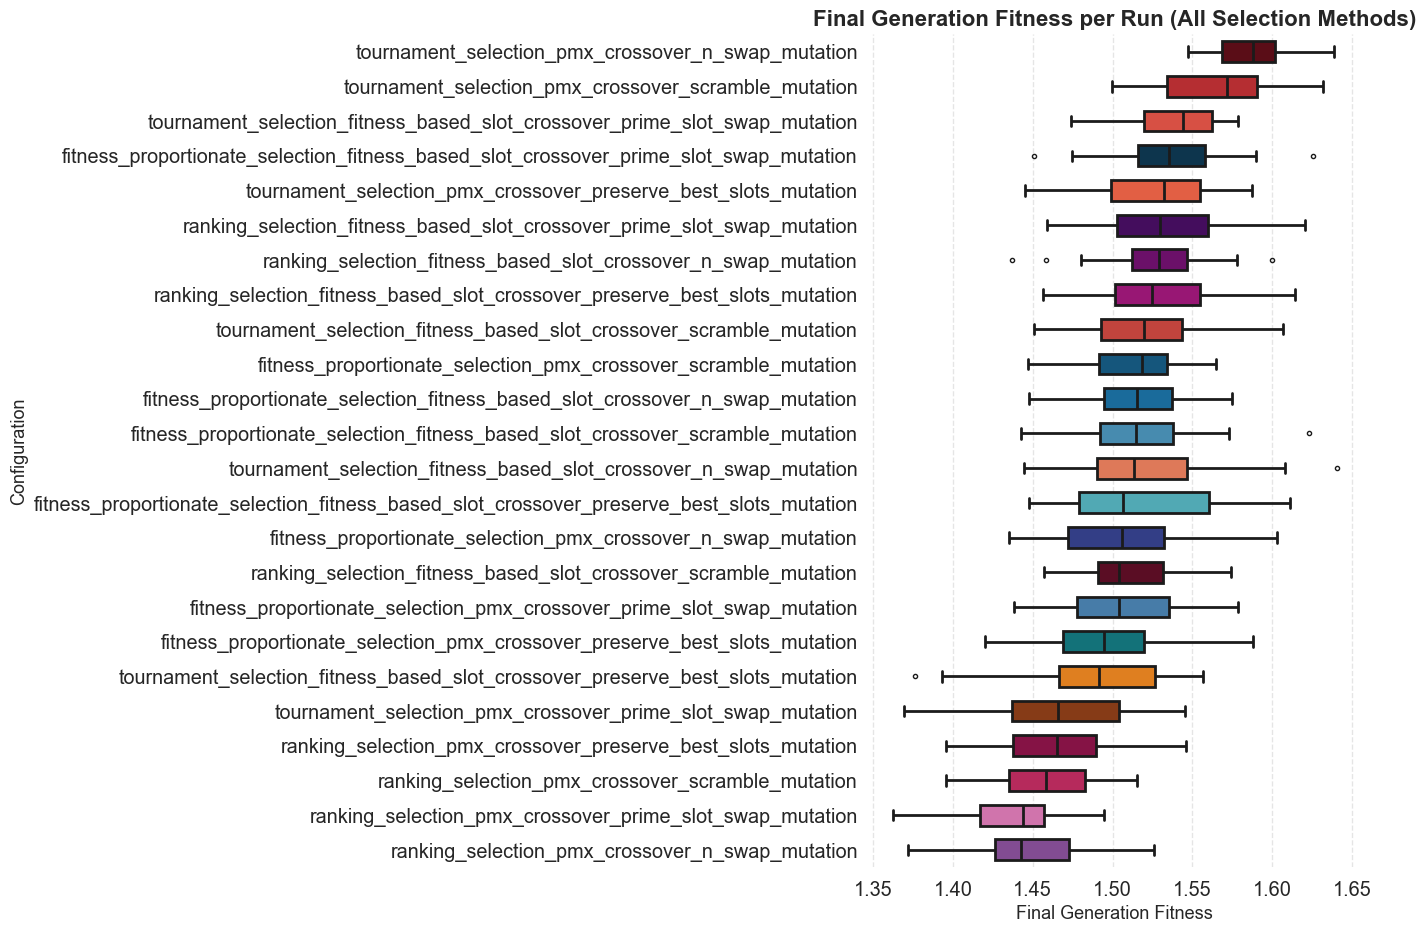

/Users/brunasimoes/Desktop/nova_ims/2_semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:174: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




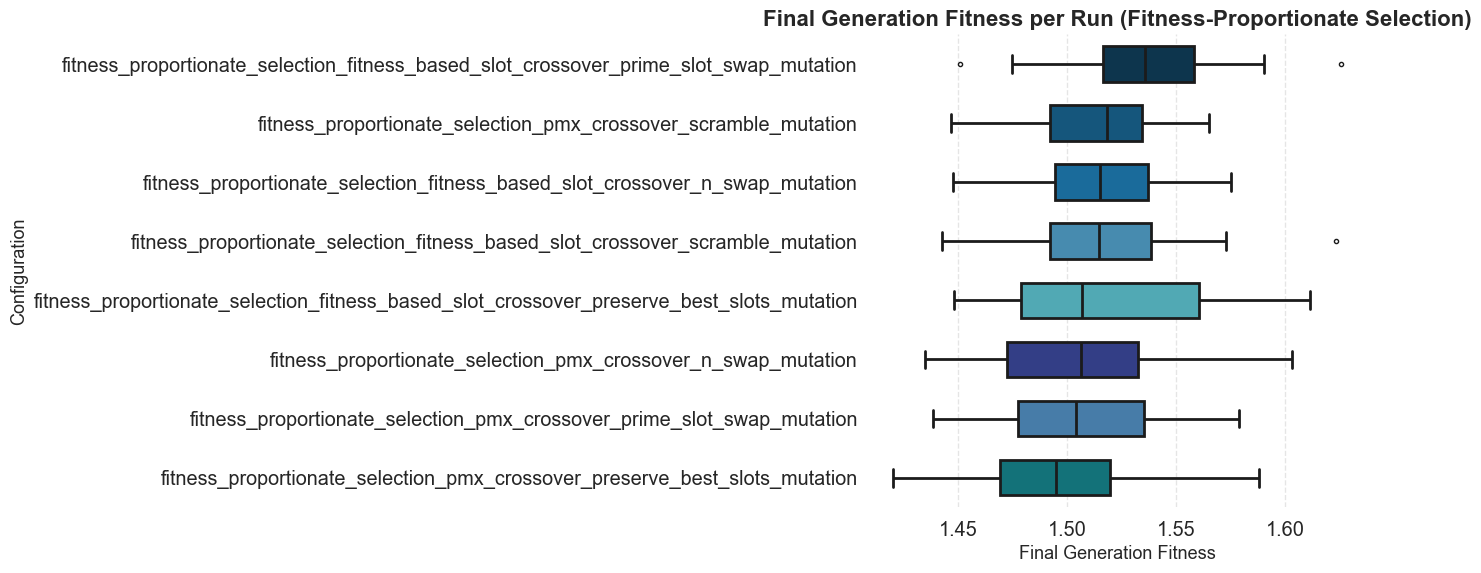

/Users/brunasimoes/Desktop/nova_ims/2_semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:174: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




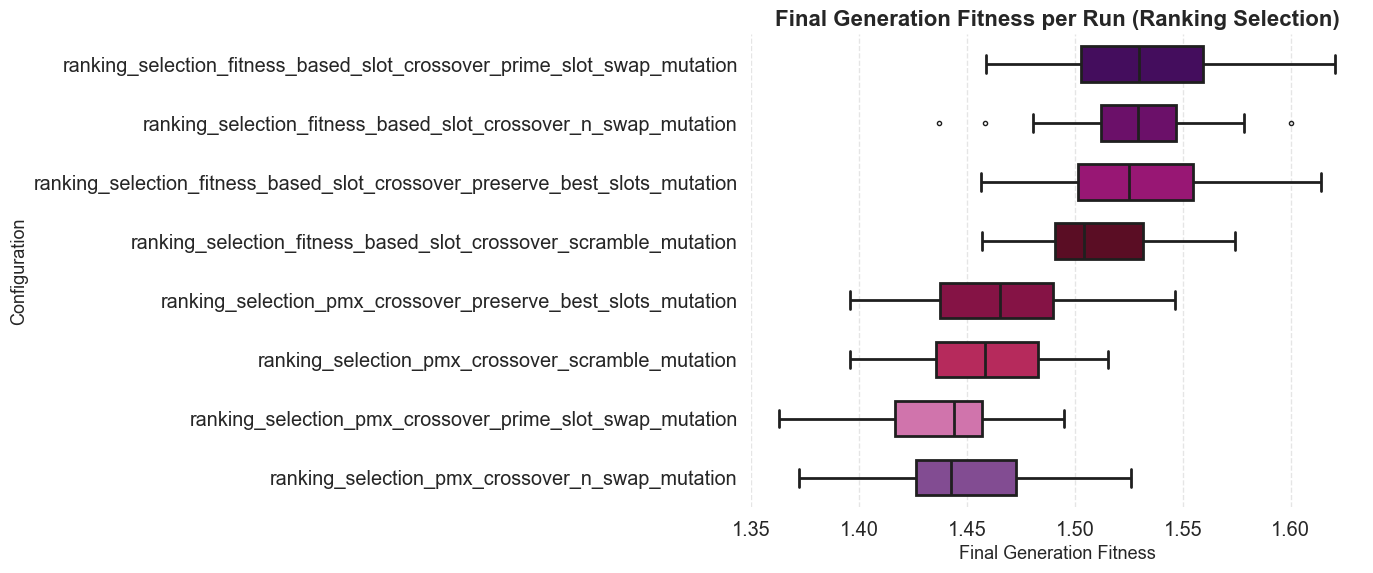

/Users/brunasimoes/Desktop/nova_ims/2_semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:174: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




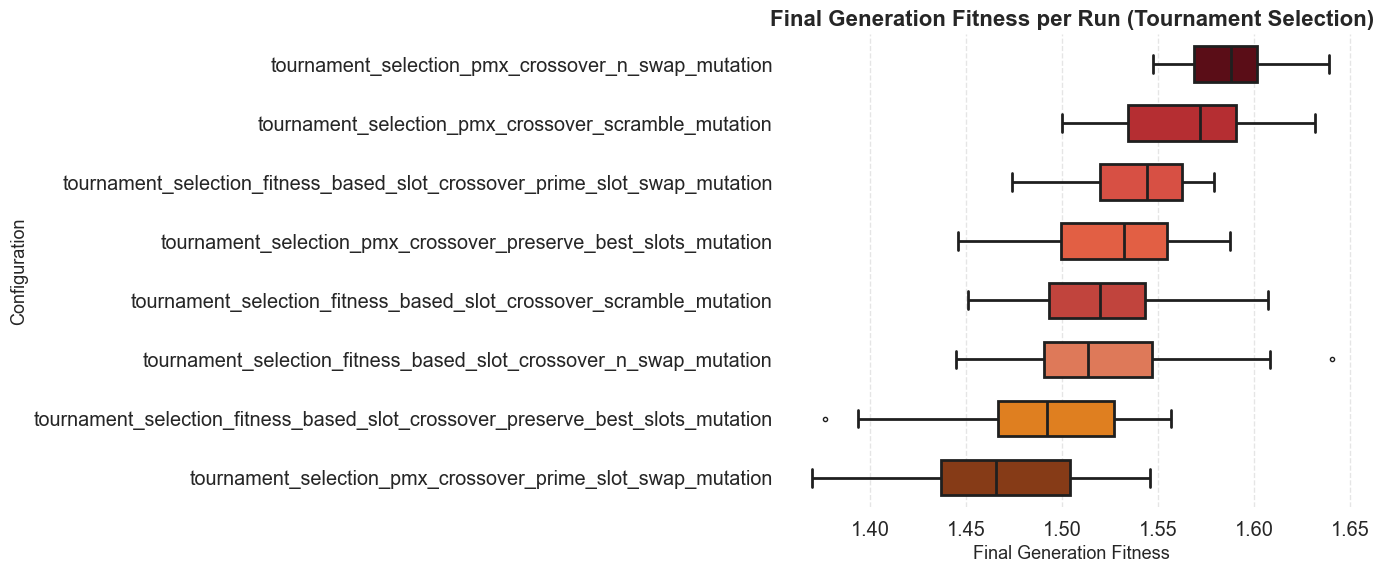

In [17]:
plot_final_fitness_boxplots(fitness_dfs, title_suffix='All Selection Methods')
plot_final_fitness_boxplots(fitprop_fitness_dfs, title_suffix='Fitness-Proportionate Selection')
plot_final_fitness_boxplots(ranking_fitness_dfs, title_suffix='Ranking Selection')
plot_final_fitness_boxplots(tournament_fitness_dfs, title_suffix='Tournament Selection')

## **2.3** Operators' Isolated Comparison

In [18]:
selection_names = ["fitness_proportionate_selection", "ranking_selection", "tournament_selection"]
crossover_names = ["pmx_crossover", "fitness_based_slot_crossover"]
mutation_names = ["n_swap_mutation", "scramble_mutation", "prime_slot_swap_mutation", "preserve_best_slots_mutation"]

### **2.3.1** Approach 1 - Aggregate Raw Runs

Group all runs that use a particular hyperparameter value and compute the median best fitness across those runs.

In [19]:
selection_fit_dfs = {}
crossover_fit_dfs = {}
mutation_fit_dfs = {}

# Combine all isolated runs using a given selection
for selection_name in selection_names:
    dfs_to_concat = []
    for df_name, df in fitness_dfs.items():
        if selection_name in df_name:
            dfs_to_concat.append(df)
    if dfs_to_concat:
        selection_fit_dfs[selection_name] = pd.concat(dfs_to_concat, axis=0).reset_index(drop=True)

# Combine all isolated runs using a given crossover
for crossover_name in crossover_names:
    dfs_to_concat = []
    for df_name, df in fitness_dfs.items():
        if crossover_name in df_name:
            dfs_to_concat.append(df)
    if dfs_to_concat:
        crossover_fit_dfs[crossover_name] = pd.concat(dfs_to_concat, axis=0).reset_index(drop=True)

# Combine all isolated runs using a given mutation
for mutation_name in mutation_names:
    dfs_to_concat = []
    for df_name, df in fitness_dfs.items():
        if mutation_name in df_name:
            dfs_to_concat.append(df)
    if dfs_to_concat:
        mutation_fit_dfs[mutation_name] = pd.concat(dfs_to_concat, axis=0).reset_index(drop=True)

In [20]:
plot_component_comparisons(selection_fit_dfs, crossover_fit_dfs, mutation_fit_dfs)

### **2.3.2** Approach 2 - Aggregate by Configuration

First calculate the median result for each configuration, and then take the median of those medians for the ones sharing the same hyperparameter value.

In [21]:
selection_medians = {k: [] for k in selection_names}
crossover_medians = {k: [] for k in crossover_names}
mutation_medians = {k: [] for k in mutation_names}

for df_name, df in fitness_dfs.items():
    for selection_name in selection_names:
        if selection_name in df_name:
            # Calculate median best fitness over generations for configuration using this selection
            selection_medians[selection_name].append(df.median(axis=0).values)
    for crossover_name in crossover_names:
        if crossover_name in df_name:
            # Calculate median best fitness over generations for configuration using this crossover
            crossover_medians[crossover_name].append(df.median(axis=0).values)
    for mutation_name in mutation_names:
        if mutation_name in df_name:
            # Calculate median best fitness over generations for configuration using this mutation
            mutation_medians[mutation_name].append(df.median(axis=0).values)

# Final median curves: median of medians across configurations
selection_curves = {k: np.median(v, axis=0) for k, v in selection_medians.items() if v}
crossover_curves = {k: np.median(v, axis=0) for k, v in crossover_medians.items() if v}
mutation_curves = {k: np.median(v, axis=0) for k, v in mutation_medians.items() if v}

In [22]:
plot_component_comparisons_from_curves(selection_curves , crossover_curves, mutation_curves)

## **2.4** Wilcoxon Test

In [23]:
best_configs = [
    'fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation',
    'fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation',
    'fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation',
    'fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation',
    'fitness_proportionate_selection_pmx_crossover_n_swap_mutation',
    'fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation',
    'fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation',
    'fitness_proportionate_selection_pmx_crossover_scramble_mutation',
    'ranking_selection_fitness_based_slot_crossover_n_swap_mutation',
    'ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation',
    'ranking_selection_fitness_based_slot_crossover_prime_slot_swap_mutation',
    'ranking_selection_fitness_based_slot_crossover_scramble_mutation',
    'ranking_selection_pmx_crossover_n_swap_mutation',
    'ranking_selection_pmx_crossover_preserve_best_slots_mutation',
    'ranking_selection_pmx_crossover_prime_slot_swap_mutation',
    'ranking_selection_pmx_crossover_scramble_mutation',
    'tournament_selection_fitness_based_slot_crossover_n_swap_mutation',
    'tournament_selection_fitness_based_slot_crossover_preserve_best_slots_mutation',
    'tournament_selection_fitness_based_slot_crossover_prime_slot_swap_mutation',
    'tournament_selection_fitness_based_slot_crossover_scramble_mutation',
    'tournament_selection_pmx_crossover_n_swap_mutation',
    'tournament_selection_pmx_crossover_preserve_best_slots_mutation',
    'tournament_selection_pmx_crossover_prime_slot_swap_mutation',
    'tournament_selection_pmx_crossover_scramble_mutation']

In [24]:
# Collect final generation fitness for each configuration
final_gen_fitness = {
    name: df.iloc[:, -1].values  # last column = final generation
    for name, df in fitness_dfs.items()
    if name in best_configs
}

p_values_df = pd.DataFrame(index=best_configs, columns=best_configs)

#fill the p-values from Wilcoxon test
for (cfg1, cfg2) in combinations(best_configs, 2):
    stat, p = wilcoxon(final_gen_fitness[cfg1], final_gen_fitness[cfg2])
    p_values_df.loc[cfg1, cfg2] = p
    p_values_df.loc[cfg2, cfg1] = p

# the diagonal should be 1.0 (self-comparison)
for cfg in best_configs:
    p_values_df.loc[cfg, cfg] = 1.0

p_values_df = p_values_df.astype(float)

print("Wilcoxon p-values matrix (α = 0.05):")
display(p_values_df)

# Highlight significant differences
significant = p_values_df < 0.05
print("\nSignificant differences (True = p < 0.05):")
display(significant)

Wilcoxon p-values matrix (α = 0.05):


,fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,fitness_proportionate_selection_pmx_crossover_n_swap_mutation,fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_pmx_crossover_scramble_mutation,ranking_selection_fitness_based_slot_crossover_n_swap_mutation,ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,...,ranking_selection_pmx_crossover_prime_slot_swap_mutation,ranking_selection_pmx_crossover_scramble_mutation,tournament_selection_fitness_based_slot_crossover_n_swap_mutation,tournament_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,tournament_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,tournament_selection_fitness_based_slot_crossover_scramble_mutation,tournament_selection_pmx_crossover_n_swap_mutation,tournament_selection_pmx_crossover_preserve_best_slots_mutation,tournament_selection_pmx_crossover_prime_slot_swap_mutation,tournament_selection_pmx_crossover_scramble_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,1.000000e+00,5.837571e-01,3.098481e-02,8.552717e-01,5.158484e-01,6.666471e-02,4.044945e-01,8.552717e-01,2.206468e-01,2.054097e-01,...,2.607703e-08,3.790483e-06,5.978078e-01,1.003974e-01,2.020182e-03,8.552717e-01,3.725290e-09,7.672122e-02,2.688542e-05,1.991168e-06
fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,5.837571e-01,1.000000e+00,2.054097e-01,1.000000e+00,4.399668e-01,3.453673e-02,3.284699e-01,5.425279e-01,2.988441e-01,5.978078e-01,...,1.862645e-08,2.688542e-05,9.676736e-01,4.971012e-02,1.966082e-02,8.235769e-01,5.718321e-07,3.817984e-01,1.824461e-05,1.886003e-04
fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,3.098481e-02,2.054097e-01,1.000000e+00,1.094321e-01,6.194992e-03,2.020182e-03,6.194992e-03,4.725905e-02,4.044945e-01,3.707406e-01,...,1.862645e-09,5.587935e-09,1.459995e-01,3.127549e-04,5.698576e-01,1.293531e-01,2.762303e-06,8.393927e-01,2.348796e-06,9.931510e-03
fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,8.552717e-01,1.000000e+00,1.094321e-01,1.000000e+00,2.988441e-01,1.048399e-01,1.909295e-01,6.583221e-01,1.909295e-01,4.399668e-01,...,1.862645e-09,7.994473e-06,9.032265e-01,8.406548e-02,1.718590e-03,9.353987e-01,2.551824e-07,3.387418e-01,1.597777e-05,1.396611e-05
fitness_proportionate_selection_pmx_crossover_n_swap_mutation,5.158484e-01,4.399668e-01,6.194992e-03,2.988441e-01,1.000000e+00,2.621223e-01,9.676736e-01,5.978078e-01,5.492163e-02,1.094321e-01,...,1.303852e-07,1.373943e-04,2.988441e-01,2.285528e-01,1.864007e-03,5.291052e-01,5.587935e-09,4.490721e-02,9.301122e-03,1.597777e-05
fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,6.666471e-02,3.453673e-02,2.020182e-03,1.048399e-01,2.621223e-01,1.000000e+00,3.387418e-01,1.141767e-01,4.338233e-03,1.453802e-02,...,3.239140e-06,3.800932e-04,2.341014e-02,7.765688e-01,1.698975e-04,1.059826e-02,1.862645e-09,3.475156e-03,7.111456e-03,1.419336e-06
fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,4.044945e-01,3.284699e-01,6.194992e-03,1.909295e-01,9.676736e-01,3.387418e-01,1.000000e+00,3.598779e-01,2.478605e-02,7.672122e-02,...,4.656613e-08,2.562888e-04,1.771927e-01,3.707406e-01,6.084088e-04,2.893662e-01,1.862645e-09,1.283373e-02,7.111456e-03,1.192093e-06
fitness_proportionate_selection_pmx_crossover_scramble_mutation,8.552717e-01,5.425279e-01,4.725905e-02,6.583221e-01,5.978078e-01,1.141767e-01,3.598779e-01,1.000000e+00,1.048399e-01,1.980758e-01,...,1.862645e-09,4.712492e-07,6.701806e-01,9.61


Significant differences (True = p < 0.05):


,fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,fitness_proportionate_selection_pmx_crossover_n_swap_mutation,fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_pmx_crossover_scramble_mutation,ranking_selection_fitness_based_slot_crossover_n_swap_mutation,ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,...,ranking_selection_pmx_crossover_prime_slot_swap_mutation,ranking_selection_pmx_crossover_scramble_mutation,tournament_selection_fitness_based_slot_crossover_n_swap_mutation,tournament_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,tournament_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,tournament_selection_fitness_based_slot_crossover_scramble_mutation,tournament_selection_pmx_crossover_n_swap_mutation,tournament_selection_pmx_crossover_preserve_best_slots_mutation,tournament_selection_pmx_crossover_prime_slot_swap_mutation,tournament_selection_pmx_crossover_scramble_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,True,True
fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,False,False,False,False,False,True,False,False,False,False,...,True,True,False,True,True,False,True,False,True,True
fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,True,False,False,False,True,True,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,True,True
fitness_proportionate_selection_pmx_crossover_n_swap_mutation,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,True,True,True
fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,False,True,True,False,False,False,False,False,True,True,...,True,True,True,False,True,True,True,True,True,True
fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,False,False,True,False,False,False,False,False,True,False,...,True,True,False,False,True,False,True,True,True,True
fitness_proportionate_selection_pmx_crossover_scramble_mutation,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,True,True
ranking_selection_fitness_based_slot_crossover_n_swap_mutation,False,False,False,False,False,True,True,False,False,False,...,True,True,False,True,False,False,True,False,True,True
ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,False,False,False,False,False,True,False,False,False,False,...,True,True,False,True,True,False,True,False,True,True


In [25]:
plot_statistical_distance_graph(best_configs, final_gen_fitness, p_values_df)



<div class="alert alert-block alert-success">

# **3.** **Algorithms Comparison: Genetic Algortihm vs Simmulated Annealing and Hill Climbing**

<div>


In [7]:
df_hc = pd.read_csv("results/hill_climbing.csv")
df_sa = pd.read_csv("results/simmulated_annealing.csv")

best_config_label = 'tournament_selection_pmx_crossover_n_swap_mutation'
ga_best_fitnesses = [ast.literal_eval(gen_str)[-1] for gen_str in df_ga.loc[df_ga['Config'] == best_config_label, 'Gens_Best_Fitness']]
hc_best_fitnesses = df_hc["hc_fitness"].tolist()
sa_best_fitnesses = df_sa["sa_fitness"].tolist()

## **3.1** Standard Deviation Fitness over Runs

/var/folders/vr/c8clls693rl3z4mp61z036p80000gn/T/ipykernel_53511/1392202214.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


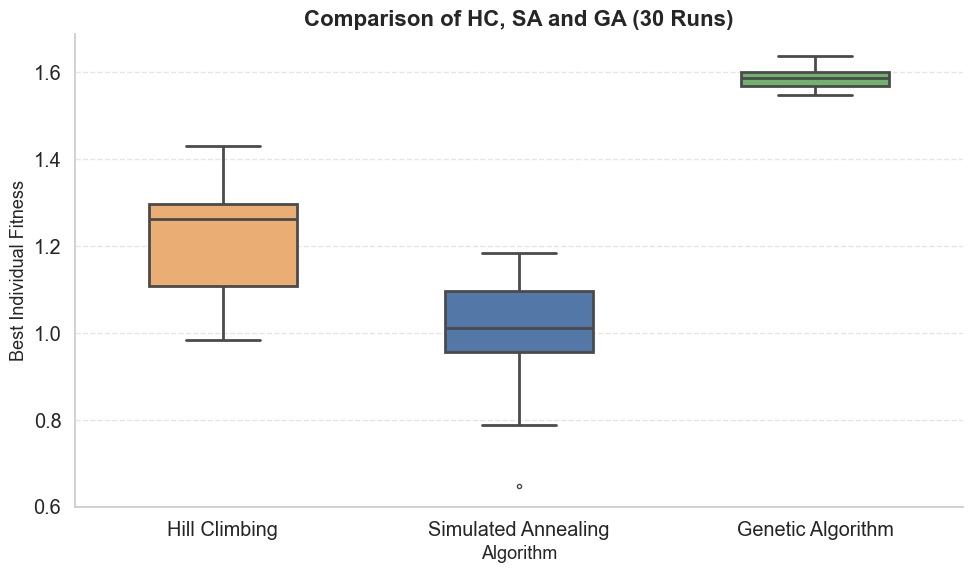

In [8]:
palette = {
    'Hill Climbing': '#fdae61',         
    'Simulated Annealing': '#4575b4',   
    'Genetic Algorithm': '#66bd63'      
}

df = pd.DataFrame({
    'value': hc_best_fitnesses + sa_best_fitnesses + ga_best_fitnesses,
    'group': (
        ['Hill Climbing'] * len(hc_best_fitnesses) +
        ['Simulated Annealing'] * len(sa_best_fitnesses) +
        ['Genetic Algorithm'] * len(ga_best_fitnesses))})

sns.set_theme(style="whitegrid", font_scale=1.3)
algo_palette = {
    'Hill Climbing': '#fdae61',
    'Simulated Annealing': '#4575b4',
    'Genetic Algorithm': '#66bd63'
}

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='group', 
    y='value', 
    data=df, 
    width=0.5, 
    linewidth=2, 
    fliersize=3,
    palette=algo_palette
)

plt.title('Comparison of HC, SA and GA (30 Runs)', fontsize=16, weight='bold')
plt.xlabel('Algorithm', fontsize=13)
plt.ylabel('Best Individual Fitness', fontsize=13)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

## **3.2** Wilcoxon Test

In [9]:
best_configs = [
    'fitness_proportionate_selection_pmx_crossover_n_swap_mutation',
    'fitness_proportionate_selection_pmx_crossover_scramble_mutation',
    ]

In [26]:
# Collect final generation fitness for each configuration
final_gen_fitness = {
    name: df.iloc[:, -1].values  # last column = final generation
    for name, df in fitness_dfs.items()
    if name in best_configs
}

p_values_df = pd.DataFrame(index=best_configs, columns=best_configs)

#fill the p-values from Wilcoxon test
for (cfg1, cfg2) in combinations(best_configs, 2):
    stat, p = wilcoxon(final_gen_fitness[cfg1], final_gen_fitness[cfg2])
    p_values_df.loc[cfg1, cfg2] = p
    p_values_df.loc[cfg2, cfg1] = p

# the diagonal should be 1.0 (self-comparison)
for cfg in best_configs:
    p_values_df.loc[cfg, cfg] = 1.0

p_values_df = p_values_df.astype(float)

print("Wilcoxon p-values matrix (α = 0.05):")
display(p_values_df)

# Highlight significant differences
significant = p_values_df < 0.05
print("\nSignificant differences (True = p < 0.05):")
display(significant)

Wilcoxon p-values matrix (α = 0.05):


,fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,fitness_proportionate_selection_pmx_crossover_n_swap_mutation,fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_pmx_crossover_scramble_mutation,ranking_selection_fitness_based_slot_crossover_n_swap_mutation,ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,...,ranking_selection_pmx_crossover_prime_slot_swap_mutation,ranking_selection_pmx_crossover_scramble_mutation,tournament_selection_fitness_based_slot_crossover_n_swap_mutation,tournament_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,tournament_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,tournament_selection_fitness_based_slot_crossover_scramble_mutation,tournament_selection_pmx_crossover_n_swap_mutation,tournament_selection_pmx_crossover_preserve_best_slots_mutation,tournament_selection_pmx_crossover_prime_slot_swap_mutation,tournament_selection_pmx_crossover_scramble_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,1.000000e+00,5.837571e-01,3.098481e-02,8.552717e-01,5.158484e-01,6.666471e-02,4.044945e-01,8.552717e-01,2.206468e-01,2.054097e-01,...,2.607703e-08,3.790483e-06,5.978078e-01,1.003974e-01,2.020182e-03,8.552717e-01,3.725290e-09,7.672122e-02,2.688542e-05,1.991168e-06
fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,5.837571e-01,1.000000e+00,2.054097e-01,1.000000e+00,4.399668e-01,3.453673e-02,3.284699e-01,5.425279e-01,2.988441e-01,5.978078e-01,...,1.862645e-08,2.688542e-05,9.676736e-01,4.971012e-02,1.966082e-02,8.235769e-01,5.718321e-07,3.817984e-01,1.824461e-05,1.886003e-04
fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,3.098481e-02,2.054097e-01,1.000000e+00,1.094321e-01,6.194992e-03,2.020182e-03,6.194992e-03,4.725905e-02,4.044945e-01,3.707406e-01,...,1.862645e-09,5.587935e-09,1.459995e-01,3.127549e-04,5.698576e-01,1.293531e-01,2.762303e-06,8.393927e-01,2.348796e-06,9.931510e-03
fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,8.552717e-01,1.000000e+00,1.094321e-01,1.000000e+00,2.988441e-01,1.048399e-01,1.909295e-01,6.583221e-01,1.909295e-01,4.399668e-01,...,1.862645e-09,7.994473e-06,9.032265e-01,8.406548e-02,1.718590e-03,9.353987e-01,2.551824e-07,3.387418e-01,1.597777e-05,1.396611e-05
fitness_proportionate_selection_pmx_crossover_n_swap_mutation,5.158484e-01,4.399668e-01,6.194992e-03,2.988441e-01,1.000000e+00,2.621223e-01,9.676736e-01,5.978078e-01,5.492163e-02,1.094321e-01,...,1.303852e-07,1.373943e-04,2.988441e-01,2.285528e-01,1.864007e-03,5.291052e-01,5.587935e-09,4.490721e-02,9.301122e-03,1.597777e-05
fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,6.666471e-02,3.453673e-02,2.020182e-03,1.048399e-01,2.621223e-01,1.000000e+00,3.387418e-01,1.141767e-01,4.338233e-03,1.453802e-02,...,3.239140e-06,3.800932e-04,2.341014e-02,7.765688e-01,1.698975e-04,1.059826e-02,1.862645e-09,3.475156e-03,7.111456e-03,1.419336e-06
fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,4.044945e-01,3.284699e-01,6.194992e-03,1.909295e-01,9.676736e-01,3.387418e-01,1.000000e+00,3.598779e-01,2.478605e-02,7.672122e-02,...,4.656613e-08,2.562888e-04,1.771927e-01,3.707406e-01,6.084088e-04,2.893662e-01,1.862645e-09,1.283373e-02,7.111456e-03,1.192093e-06
fitness_proportionate_selection_pmx_crossover_scramble_mutation,8.552717e-01,5.425279e-01,4.725905e-02,6.583221e-01,5.978078e-01,1.141767e-01,3.598779e-01,1.000000e+00,1.048399e-01,1.980758e-01,...,1.862645e-09,4.712492e-07,6.701806e-01,9.61


Significant differences (True = p < 0.05):


,fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,fitness_proportionate_selection_pmx_crossover_n_swap_mutation,fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,fitness_proportionate_selection_pmx_crossover_scramble_mutation,ranking_selection_fitness_based_slot_crossover_n_swap_mutation,ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,...,ranking_selection_pmx_crossover_prime_slot_swap_mutation,ranking_selection_pmx_crossover_scramble_mutation,tournament_selection_fitness_based_slot_crossover_n_swap_mutation,tournament_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,tournament_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,tournament_selection_fitness_based_slot_crossover_scramble_mutation,tournament_selection_pmx_crossover_n_swap_mutation,tournament_selection_pmx_crossover_preserve_best_slots_mutation,tournament_selection_pmx_crossover_prime_slot_swap_mutation,tournament_selection_pmx_crossover_scramble_mutation
fitness_proportionate_selection_fitness_based_slot_crossover_n_swap_mutation,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,True,True
fitness_proportionate_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,False,False,False,False,False,True,False,False,False,False,...,True,True,False,True,True,False,True,False,True,True
fitness_proportionate_selection_fitness_based_slot_crossover_prime_slot_swap_mutation,True,False,False,False,True,True,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
fitness_proportionate_selection_fitness_based_slot_crossover_scramble_mutation,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,True,True
fitness_proportionate_selection_pmx_crossover_n_swap_mutation,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,True,True,True
fitness_proportionate_selection_pmx_crossover_preserve_best_slots_mutation,False,True,True,False,False,False,False,False,True,True,...,True,True,True,False,True,True,True,True,True,True
fitness_proportionate_selection_pmx_crossover_prime_slot_swap_mutation,False,False,True,False,False,False,False,False,True,False,...,True,True,False,False,True,False,True,True,True,True
fitness_proportionate_selection_pmx_crossover_scramble_mutation,False,False,True,False,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,True,True
ranking_selection_fitness_based_slot_crossover_n_swap_mutation,False,False,False,False,False,True,True,False,False,False,...,True,True,False,True,False,False,True,False,True,True
ranking_selection_fitness_based_slot_crossover_preserve_best_slots_mutation,False,False,False,False,False,True,False,False,False,False,...,True,True,False,True,True,False,True,False,True,True


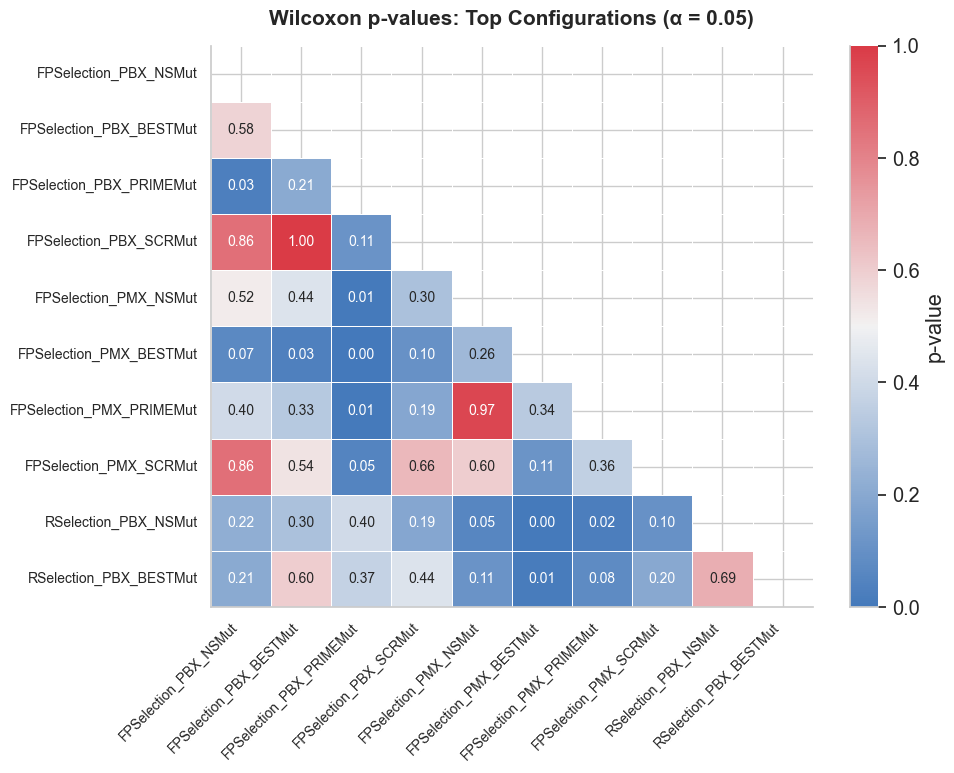

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Optional: Select top N configs based on external logic
top_configs = p_values_df.columns[:10]  # or use a specific list of best-performing configs
p_values_sub = p_values_df.loc[top_configs, top_configs]

# 2. Mapping logic
def clean_label(label):
    replacements = {
        'tournament_selection': 'TSelection',
        'ranking_selection': 'RSelection',
        'fitness_proportionate_selection': 'FPSelection',
        'fitness_based_slot_crossover': 'PBX',
        'pmx_crossover': 'PMX',
        'scramble_mutation': 'SCRMut',
        'n_swap_mutation': 'NSMut',
        'prime_slot_swap_mutation': 'PRIMEMut',
        'preserve_best_slots_mutation': 'BESTMut',
    }
    for long, short in replacements.items():
        label = label.replace(long, short)
    return label

# 3. Apply abbreviation
abbreviated_names = {name: clean_label(name) for name in p_values_sub.columns}
p_values_sub = p_values_sub.rename(columns=abbreviated_names, index=abbreviated_names)

# 4. Mask the upper triangle to reduce redundancy
mask = np.triu(np.ones_like(p_values_sub, dtype=bool))

# 5. Plot
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(
    p_values_sub,
    mask=mask,
    cmap=cmap,
    vmin=0,
    vmax=1,
    annot=True,
    fmt=".2f",
    linewidths=0.6,
    linecolor='white',
    annot_kws={"size": 10},
    cbar_kws={'label': 'p-value'}
)

plt.title("Wilcoxon p-values: Top Configurations (α = 0.05)", fontsize=15, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

# **4.** **Fine-tuned G.A Solution Analysis**

<div>

In [3]:
df_hp_tuning = pd.read_csv("results/ga/results_hp_tuning.csv")

/Users/brunasimoes/Desktop/nova_ims/2_semester/Computational Intelligence for Optimization/computational-intelligence-for-optimization-project/utils.py:497: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


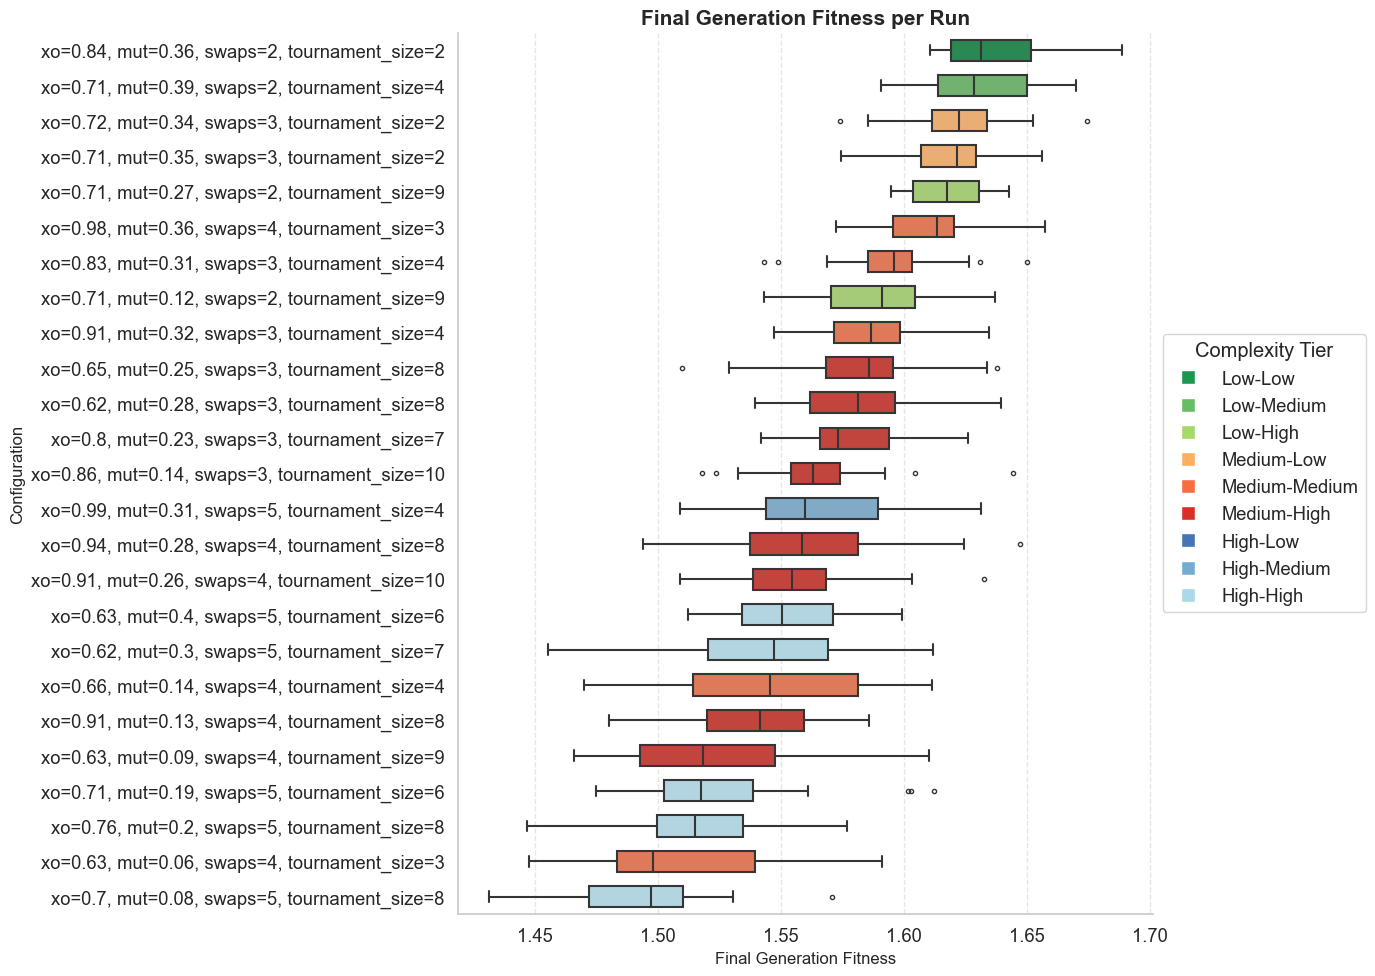

In [4]:
plot_fine_tune(df_hp_tuning)

<div class="alert alert-block alert-success">

# **5.** Adaptive Genetic Algorithm with Dynamic Mutation, Selection Pressure and Partial Replacement

<div>

In [5]:
df_adaptive_ga = pd.read_csv("results/ga/fitness_adaptive_ga.csv", index_col=0)

/var/folders/vr/c8clls693rl3z4mp61z036p80000gn/T/ipykernel_53511/3472793283.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




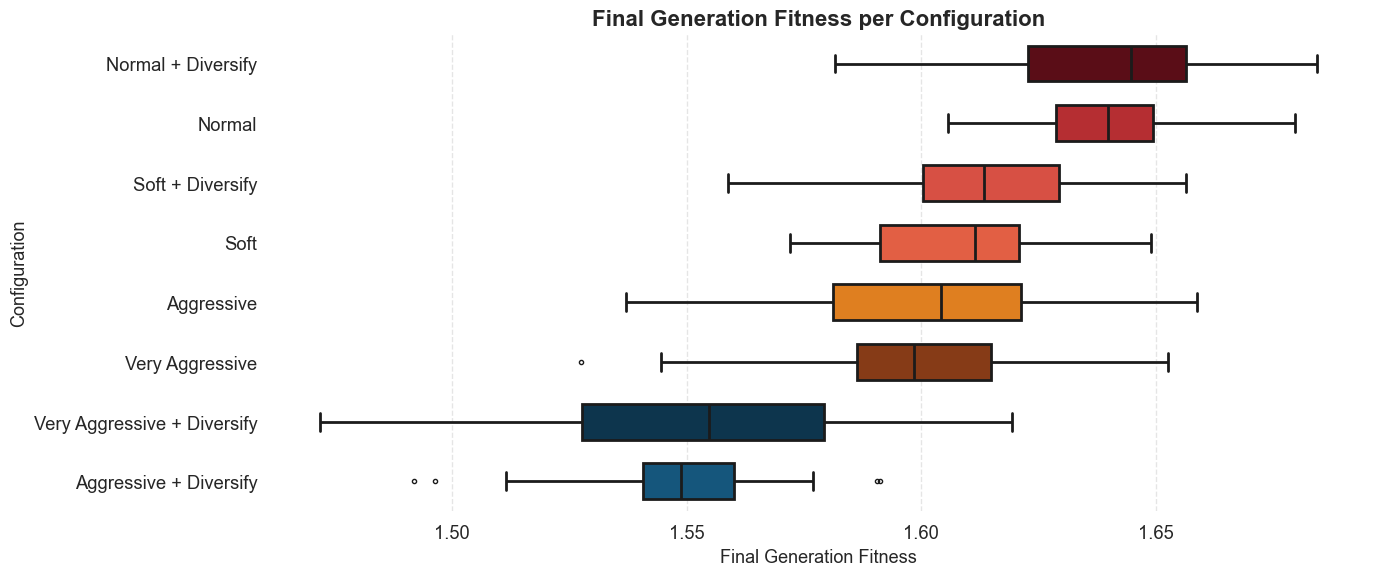

In [54]:
plot_final_fitness_adaptive_ga(df_adaptive_ga)

/var/folders/vr/c8clls693rl3z4mp61z036p80000gn/T/ipykernel_1086/224546031.py:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  grouped = df_clean.groupby(axis=1, level=0)


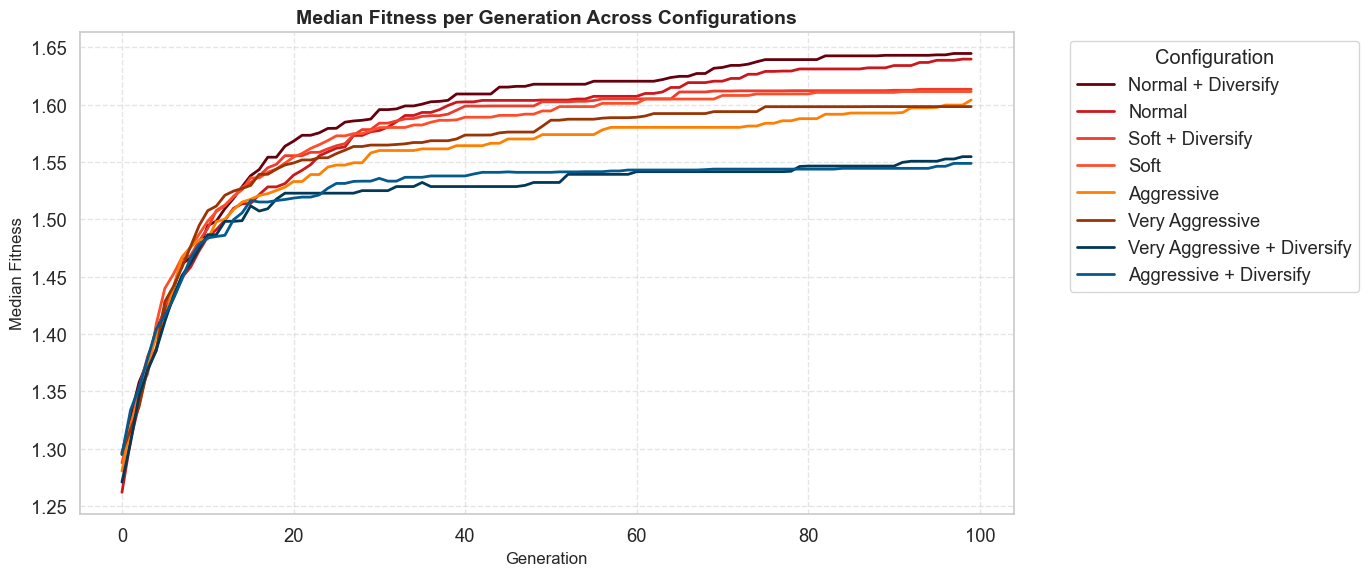

In [14]:
plot_median_fitness_over_generations(df_adaptive_ga)

In [ ]:
df_clean = df_adaptive_ga.copy()
df_clean.columns = df_clean.columns.str.replace(r"\.\d+$", "", regex=True)
normal_div_cols = [col for col in df_clean.columns if col == "Normal + Diversify"]

final_gen_values = df_clean[normal_div_cols].iloc[-1]
median_final_fitness = final_gen_values.median()

print(f"Median final fitness of Normal + Diversify: {median_final_fitness:.4f}")

Median final fitness of Normal + Diversify: 1.6447
